# Milestone 1:

---

## **Week 1: Project Initialization and Dataset Acquisition**

## 1️. Project Setup & Dataset Loading
1.1 Define project goals and expected outcomes  
1.2 Download the CICIDS2017 dataset  
1.3 Load dataset into the notebook  
1.4 Understand dataset structure and attack types  

## 2️. Initial Exploratory Data Analysis (EDA)
2.1 View first rows of the dataset  
2.2 Check dataset shape, column names, and data types  
2.3 Generate summary information  
2.4 Compute summary statistics (mean, std, min, max)  

## 3️. Data Quality & Distribution Analysis
3.1 Analyze class distribution (attack vs normal)  
3.2 Identify skewed features  
3.3 Explore feature distributions (histograms, scatterplots, boxplots)  
3.4 Detect outliers using boxplots & statistical checks  
3.5 Check feature correlations using heatmap  





##  **Week 2: Data Cleaning and Preprocessing**

## 4️. Data Cleaning
4.1 Identify and handle missing values  
4.2 Detect and remove duplicate rows  
4.3 Remove irrelevant or constant features  
4.4 Handle infinite values and extreme outliers (replace using median)  

## 5️. Feature Preprocessing
5.1 Convert categorical columns using Label Encoding or One-Hot Encoding  
5.2 Analyze important vs. non-important features  
5.3 Normalize or standardize numerical features (e.g., StandardScaler)  

## 6️. Dataset Preparation for ML
6.1 Save cleaned dataset  
6.2 Split dataset into training and testing sets  
6.3 Save final processed dataset for model training  

------

## **1️. Project Setup**

### 1.1 Define Project Goals and Expected Outcomes

The goal of this project is to develop **SentinelNet**, an **AI-powered Network Intrusion Detection System (NIDS)** that can automatically identify malicious network traffic and cyber-attacks in real time.  

By leveraging **machine learning algorithms**, the system will classify network traffic as **normal** or **suspicious** based on historical data.  
The model will process network traffic records, extract features, train classification models, and generate alerts when potential intrusions are detected.


### 1.2 Download the CICIDS2017 Dataset

The **CICIDS2017 dataset** was created by the **Canadian Institute for Cybersecurity (CIC)**.  
It contains **real-world, labeled network traffic** captured over several days, including both **benign (normal)** activities and various **attack types**.

**Steps to Download:**

1. Go to the official CIC dataset website:  
   🔗 [https://www.unb.ca/cic/datasets/ids-2017.html](https://www.unb.ca/cic/datasets/ids-2017.html)
2. Scroll down to the **“Download”** section.  
3. Choose **CSV files** (they contain preprocessed flow data generated by *CICFlowMeter*).  
   > These CSV files are ready to use for ML model training — no need to process raw PCAP files.
4. Click **Download** to get all-day flow CSVs, for example:  
   - `Monday-WorkingHours.csv`  
   - `Friday-WorkingHours.csv`


### 1.3 Load Dataset into the Notebook

- Load the downloaded CSV file(s) into Colab or your Python environment using **pandas**.  


- **Mount Google Drive** to access large CSV files stored in your Drive using:
```python
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path, nrows=50000)

df.head()


Mounted at /content/drive


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN



###  1.4 Understand Dataset Structure
- Target column: `Label` (indicates normal or attack)  
- Features: Network traffic flow statistics (source/destination IP, ports, protocols, flow duration, packet size, inter-arrival times, etc.)  
- Perform basic exploratory data analysis (EDA):
  - Summary statistics (mean, std, min, max)
  - Class distribution (normal vs attack)
  - Check for skewed features


## **2. Initial Exploratory Data Analysis (EDA)**
### 2.1 View first rows of the dataset
- Look at the first few rows using `df.head()` to quickly understand the structure and values of the dataset.


In [2]:
# Preview first 5 rows of dataset
df.head()


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### 2.2 Check Dataset Shape, Columns, and Data Types
- `df.shape` gives number of rows and columns.
- `df.columns` lists all column names.
- `df.dtypes` shows data type of each column (numeric, object, etc.).


In [3]:
# Check number of rows and columns
print("Shape of dataset:", df.shape)

# List all column names
print("Columns:", df.columns.tolist())

# Check data types
print("Data types:\n", df.dtypes)


Shape of dataset: (50000, 85)
Columns: ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Pack

### 2.3 Generate Summary Information
- `df.info()` provides:
  - Number of non-null values per column
  - Data types
  - Memory usage
- Useful to quickly identify missing data and column types.


In [4]:
# Generate dataset summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Flow ID                       50000 non-null  object 
 1    Source IP                    50000 non-null  object 
 2    Source Port                  50000 non-null  int64  
 3    Destination IP               50000 non-null  object 
 4    Destination Port             50000 non-null  int64  
 5    Protocol                     50000 non-null  int64  
 6    Timestamp                    50000 non-null  object 
 7    Flow Duration                50000 non-null  int64  
 8    Total Fwd Packets            50000 non-null  int64  
 9    Total Backward Packets       50000 non-null  int64  
 10  Total Length of Fwd Packets   50000 non-null  int64  
 11   Total Length of Bwd Packets  50000 non-null  float64
 12   Fwd Packet Length Max        50000 non-null  int64  
 13   

### 2.4 Compute Summary Statistics
- `df.describe()` computes basic statistics for numeric columns:
  - Count, mean, standard deviation, min, 25%, 50%, 75%, max
- Helps understand distribution and scale of features.


In [5]:
# Compute summary statistics for numeric columns
df.describe()


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,...,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,41656.277240,6080.661680,9.076460,2.225595e+07,55.234760,69.205800,1.128107e+03,1.462030e+05,276.643640,15.898380,...,48.608960,25.690640,1.749759e+05,1.616259e+05,3.789952e+05,7.271852e+04,7.548684e+06,5.696449e+05,8.244547e+06,7.064113e+06
std,21740.847157,15728.764805,4.949063,3.992779e+07,2770.173164,3646.712568,1.729000e+04,8.310297e+06,645.009013,35.001328,...,2651.463295,6.491682,9.230234e+05,9.163620e+05,1.696174e+06,6.334213e+05,1.903753e+07,3.812554e+06,2.015497e+07,1.880645e+07
min,0.000000,0.000000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,35868.000000,80.000000,6.000000,9.233750e+03,2.000000,1.000000,3.100000e+01,0.000000e+00,31.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,50317.000000,123.000000,6.000000,1.899200e+05,3.000000,1.000000,7.600000e+01,1.130000e+02,50.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,56984.500000,443.000000,17.000000,1.421120e+07,10.000000,7.000000,6.980000e+02,2.524500e+03,381.000000,40.000000,...,5.000000,32.000000,2.972109e+04,0.000000e+00,3.683900e+04,1.498300e+04,8.479028e+06,0.000000e+00,9.800594e+06,5.508350e+06
max,65521.000000,63866.000000,17.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,1460.000000,...,197124.000000,60.000000,6.800000e+07,7.000000e+07,9.900000e+07,6.800000e+07,1.200000e+08,7.170000e+07,1.200000e+08,1.200000e+08


## **3️. Data Quality & Distribution Analysis**
### 3.1 Class Distribution: Normal vs Attack
- `df[' Label'].value_counts()` shows how many samples are Normal vs Attack.
- `class_counts.plot(kind='bar')` visualizes the class ratio.
- Helps detect class imbalance in the dataset.



 Label
BENIGN           47339
DoS slowloris     2661
Name: count, dtype: int64


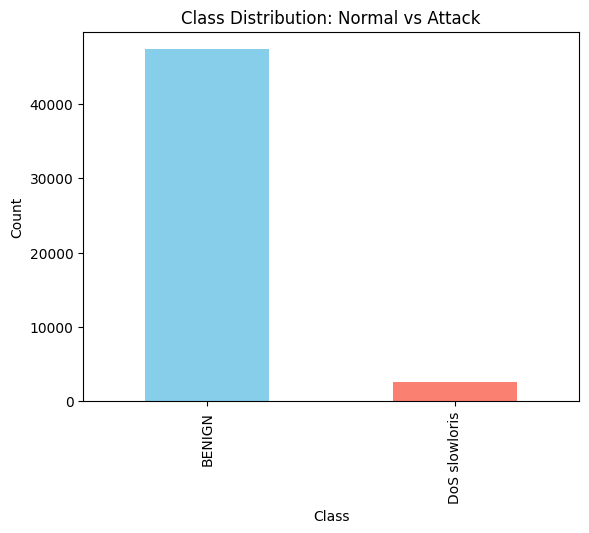

In [6]:

class_counts = df[' Label'].value_counts()
print(class_counts)

# Bar plot
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution: Normal vs Attack")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


### 3.2 Identify Skewed Features
- Compute skewness using `df.skew()` for numeric columns.
- Skewed features may need transformation before training ML models.


In [7]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
skew_values = df[numeric_cols].skew().sort_values(ascending=False)
print(skew_values.head(10))


 Total Backward Packets         66.798718
 Subflow Bwd Packets            66.798718
 Bwd Header Length              66.789454
 Fwd Header Length.1            66.470562
 Fwd Header Length              66.470562
 Total Fwd Packets              66.315142
Subflow Fwd Packets             66.315142
 act_data_pkt_fwd               66.295197
 Subflow Bwd Bytes              66.071021
 Total Length of Bwd Packets    66.067813
dtype: float64


/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


### 3.3 Explore Feature Distributions
- Use histograms to visualize distribution of numeric features.
- Helps identify outliers, scale differences, or unusual patterns.


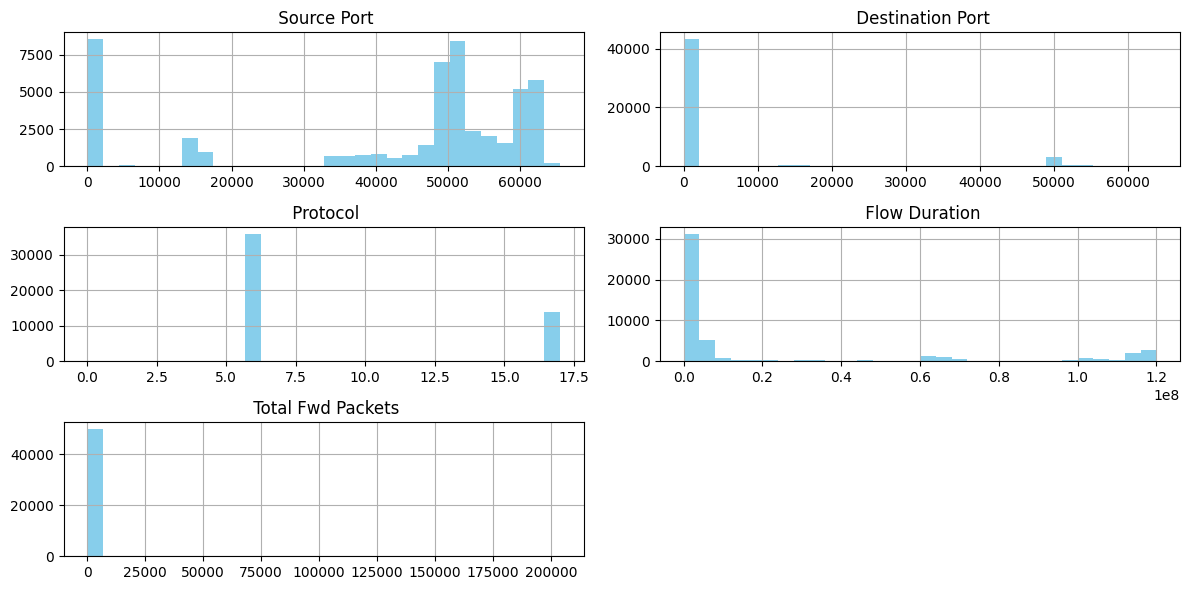

In [8]:
#  histograms
df[numeric_cols[:5]].hist(figsize=(12,6), bins=30, color='skyblue')
plt.tight_layout()
plt.show()


### 3.4 Detect Outliers Using Boxplots
- Boxplots help visualize outliers in numeric features.
- Outliers may affect ML model performance.


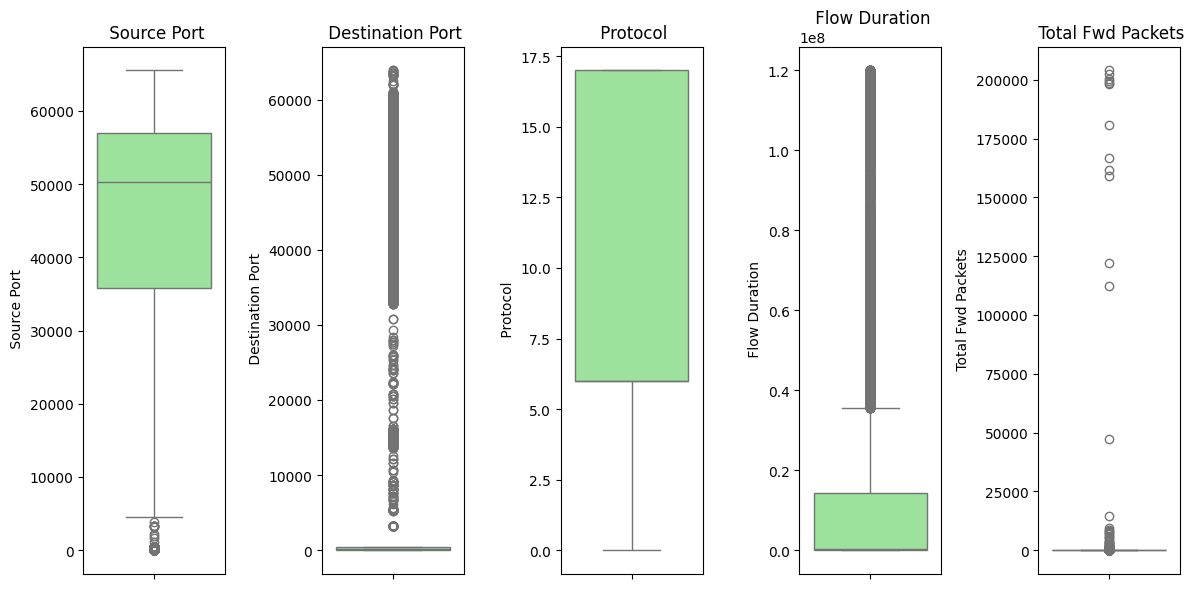

In [9]:
import seaborn as sns

# Boxplots
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols[:5], 1):
    plt.subplot(1,5,i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


### 3.5 Check Feature Correlations
- Compute correlation matrix using `df.corr()`.
- Visualize using a heatmap.
- Helps identify highly correlated features that can be redundant.


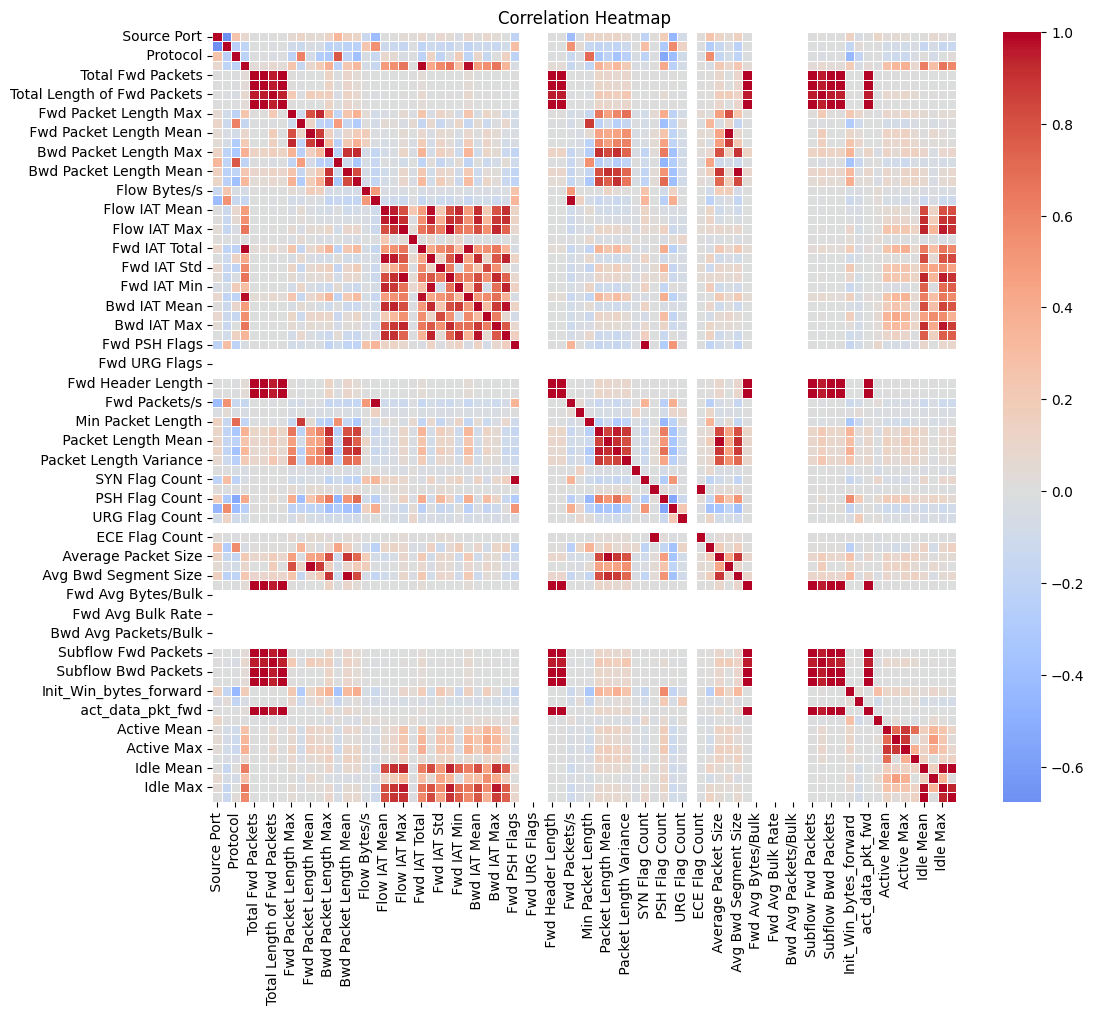

In [10]:
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## 4️. Data Cleaning
### 4.1 Identify and Handle Missing Values
- Check for missing values using `isnull().sum()`.
- Fill missing numeric values with median to avoid affecting ML models.
- For categorical features, fill missing values with mode (most frequent value).


In [12]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [c for c in cat_cols if c != ' Label']
for c in cat_cols:
    df[c] = df[c]


Missing values per column:
 Flow Bytes/s    9
dtype: int64


### 4.2 Detect and Remove Duplicate Records
- Check for duplicate rows using `duplicated()`.
- Remove duplicates with `drop_duplicates()` to ensure data quality.


In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (50000, 85)


### 4.3 Remove Irrelevant or Constant Features
- Drop columns that are irrelevant for model training.
- Remove constant columns (same value for all rows) as they don't add information.


In [14]:
# Drop constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns to drop:", constant_cols)

df = df.drop(columns=constant_cols)
print("Shape after dropping constant columns:", df.shape)


Constant columns to drop: [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Shape after dropping constant columns: (50000, 75)


### 4.4 Handle Infinite Values and Extreme Outliers
- Replace infinite values with NaN.
- Fill NaNs with median to prevent errors during model training.


In [16]:

import numpy as np

df = df.replace([np.inf, -np.inf], np.nan)

# Fill NaNs in numeric columns with median
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())




## 5️. Feature Preprocessing
### 5.1 Encode Categorical Columns
- Convert categorical features into numeric form using `LabelEncoder`.
- This allows ML models (like Random Forest) to process categorical data.


In [18]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = [c for c in df.select_dtypes(include='object').columns if c != ' Label']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))




### 5.2 Analyze Important vs Non-Important Features
- Use correlation heatmap or variance analysis to check feature importance.
- Helps to identify features that may not contribute to model performance.


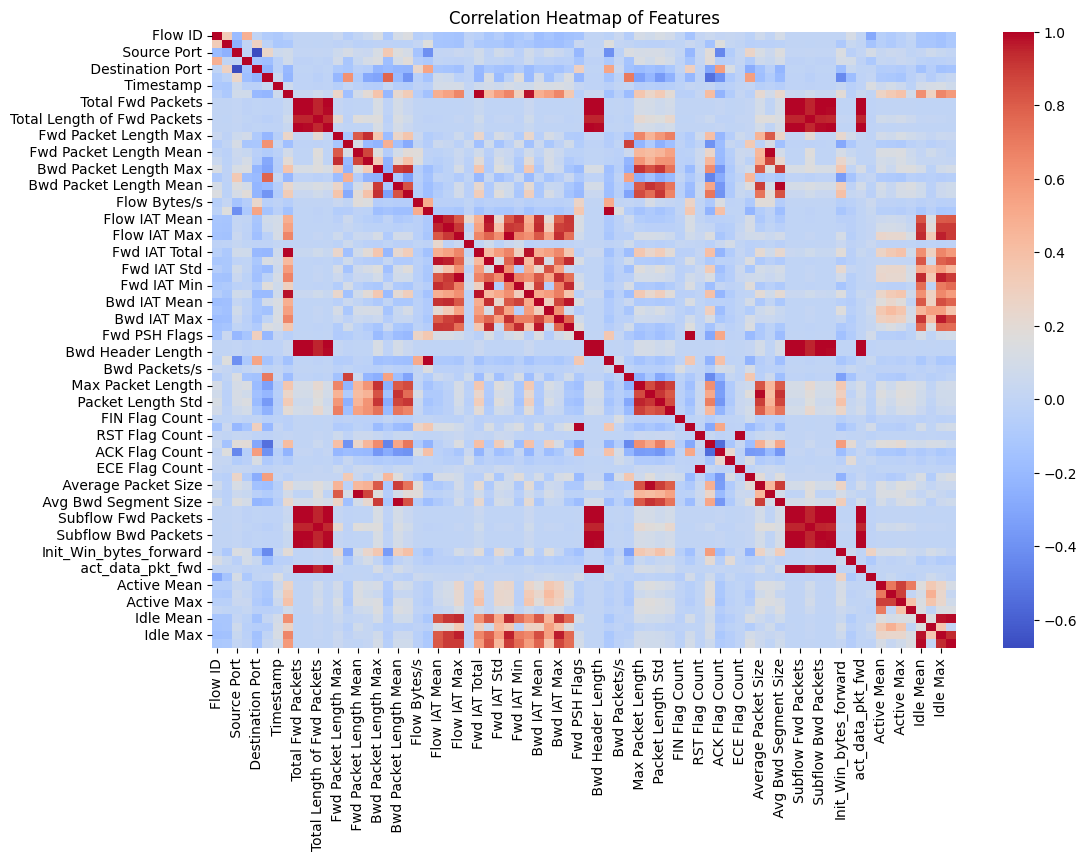

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


### 5.3 Normalize or Standardize Numerical Features
- StandardScaler is used to scale numeric features to mean=0 and std=1.
- Helps models converge faster and prevents features with large ranges from dominating.


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



## 6. Dataset Preparation for ML
### 6.1 Save Cleaned Dataset
- After cleaning and preprocessing, save the dataset to Google Drive.
- This ensures we don't repeat the cleaning steps and can reuse the cleaned data for ML models.


In [23]:
# Save the cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/cleaned_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
print(f" Cleaned dataset saved to {cleaned_file_path}")


 Cleaned dataset saved to /content/drive/MyDrive/cleaned_dataset.csv


### 6.2 Split Dataset into Training and Testing Sets
- Separate features (X) and target (y).  
- Use 70% of data for training and 30% for testing.  
- Stratify the split to maintain class distribution.


In [24]:
from sklearn.model_selection import train_test_split

#  target column
target_col = ' Label'

X = df.drop(columns=[target_col])
y = df[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35000, 74)
X_test shape: (15000, 74)
y_train shape: (35000,)
y_test shape: (15000,)


### 6.3 Save Final Processed Dataset for Model Training
- Save the train and test splits if you want to reuse them without splitting again.
- This helps in consistent training and testing for ML models.


In [25]:
# Save train and test sets
X_train.to_csv('/content/drive/MyDrive/X_train_wednesday.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/X_test_wednesday.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/y_train_wednesday.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/y_test_wednesday.csv', index=False)


